Classes: ['malignant' 'benign']
Feature shape: (569, 30)

Linear SVM Accuracy: 0.9912280701754386
RBF SVM Accuracy: 0.9649122807017544

Linear SVM Confusion Matrix:
 [[42  1]
 [ 0 71]]

RBF SVM Confusion Matrix:
 [[39  4]
 [ 0 71]]


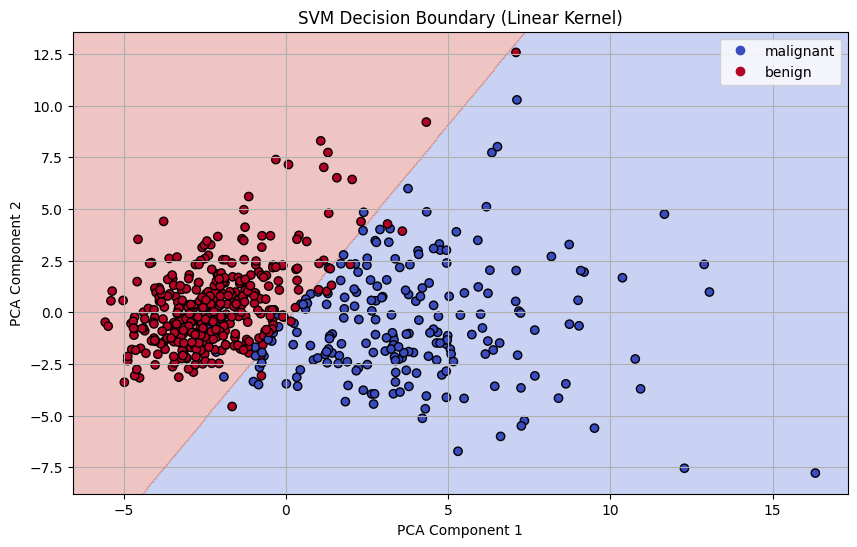

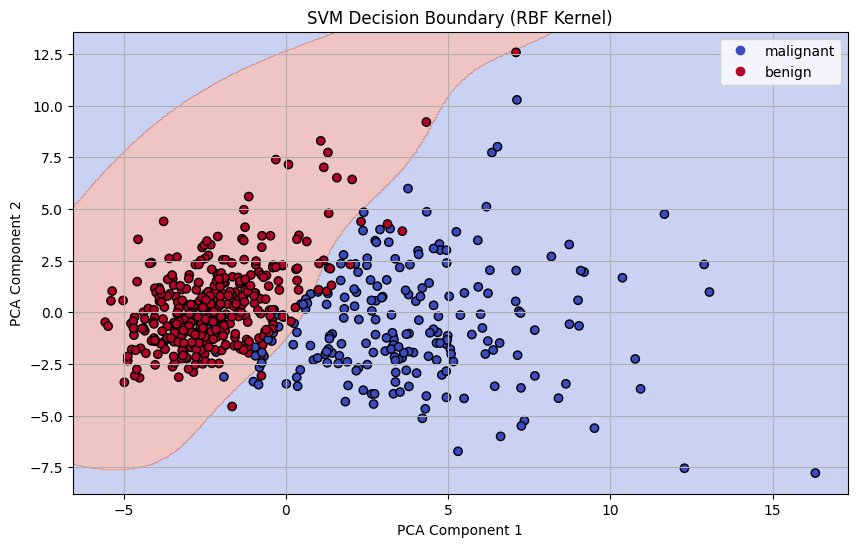


Best Parameters from GridSearchCV: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.9362637362637363

Test Accuracy of Best Model: 0.9736842105263158
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



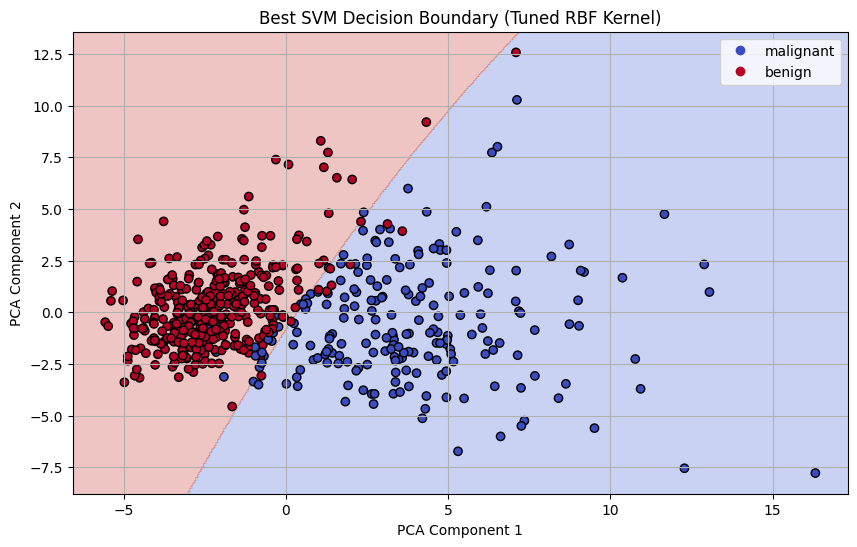

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target
print("Classes:", data.target_names)
print("Feature shape:", X.shape)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Define SVM models
svm_linear = SVC(kernel='linear', C=1)
svm_rbf = SVC(kernel='rbf', gamma='scale', C=1)

# Train models
svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

# Predictions
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

# Accuracy and confusion matrix
print("\nLinear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))

print("\nLinear SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))
print("\nRBF SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))

# Function to plot decision boundary
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 500),
        np.linspace(y_min, y_max, 500)
    )
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(handles=scatter.legend_elements()[0], labels=list(data.target_names))
    plt.grid(True)
    plt.show()

# Visualize both models
plot_decision_boundary(svm_linear, X_pca, y, "SVM Decision Boundary (Linear Kernel)")
plot_decision_boundary(svm_rbf, X_pca, y, "SVM Decision Boundary (RBF Kernel)")

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("\nBest Parameters from GridSearchCV:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

# Evaluate best model
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
print("\nTest Accuracy of Best Model:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

# Visualize decision boundary of best model
plot_decision_boundary(best_model, X_pca, y, "Best SVM Decision Boundary (Tuned RBF Kernel)")
